# Assignment8

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, pipeline, preprocessing

import pylab as pl
import itertools
import seaborn as sns

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [3]:
df = pd.read_csv("car_data.csv")

In [4]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [5]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [6]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


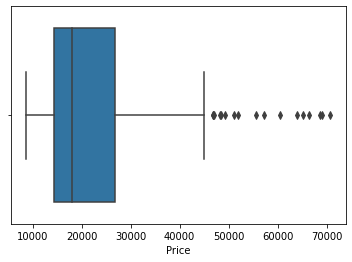

In [9]:
sns.boxplot(x=df["Price"])

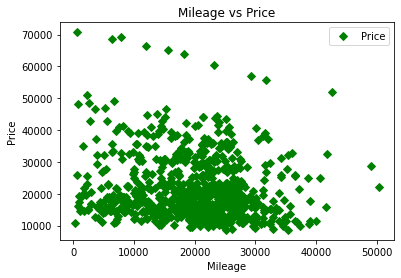

In [10]:
df.plot(x='Mileage',y='Price',style='D',color='g')
plt.title('Mileage vs Price')
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

In [11]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [12]:
X=df[["Mileage"]]
y=df[["Price"]]

In [13]:
X

,Mileage
0,8221
1,9135
2,13196
3,16342
4,19832
...,...
799,16229
800,19095
801,20484
802,25979


In [14]:
y

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324
...,...
799,16507.070267
800,16175.957604
801,15731.132897
802,15118.893228


In [15]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

In [16]:
X_train

,Mileage
334,15233
153,12021
753,22255
45,23852
348,30502
...,...
73,13050
400,1480
118,36074
701,16975


In [17]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
regressor.fit(X_train, y_train) 

LinearRegression()

In [18]:
print(regressor.intercept_)

[25260.41527217]


In [19]:
print(regressor.coef_)

[[-0.20141763]]


In [20]:
y_pred = regressor.predict(X_test)
y_pred

array([[20795.18773794],
       [24028.94785622],
       [18287.13535596],
       [19683.96664965],
       [24661.60064547],
       [17413.58707611],
       [23287.52954445],
       [18690.37345978],
       [18807.19568766],
       [16661.69504737],
       [20145.61586741],
       [17395.25807139],
       [20680.17826877],
       [21738.02368398],
       [18645.05449206],
       [19973.20237247],
       [20331.92717911],
       [21004.05782469],
       [20074.51544251],
       [20732.74827132],
       [21832.28713682],
       [21413.33845753],
       [22288.69949609],
       [21583.13352322],
       [20651.77838234],
       [22323.94758208],
       [19345.1821888 ],
       [22274.60026169],
       [20084.58632422],
       [19706.52542469],
       [20630.62953074],
       [21521.70114477],
       [21910.23576129],
       [21128.93675794],
       [23720.57745814],
       [23497.20530173],
       [21129.3395932 ],
       [24680.53390309],
       [21255.62844989],
       [23898.63064684],


In [21]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: -0.013823003638400166


# Part 1

Linerar regression equation for milege vs price

In [23]:
print(' y = {} * X + {}'.format(regressor.coef_,regressor.intercept_)) 

 y = [[-0.20141763]] * X + [25260.41527217]


Text(0.5, 1.0, 'Mileage vs Price')

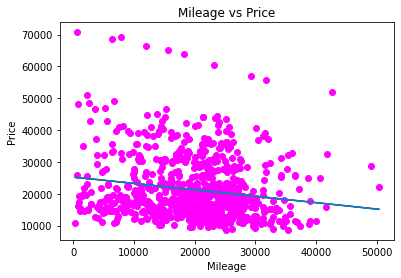

In [27]:
plt.scatter(X, y, color='magenta')
plt.plot(X, regressor.predict(X))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')

R2 Score

In [29]:
regressor.score(X, y)

0.019828203809748146

# PART 2

In [30]:
feature = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
x = df[feature]
Y = df[['Price']]

In [31]:
x

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,8221,6,3.1,4,1,1,1
1,9135,6,3.1,4,1,1,0
2,13196,6,3.1,4,1,1,0
3,16342,6,3.1,4,1,0,0
4,19832,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...
799,16229,6,3.0,4,1,0,0
800,19095,6,3.0,4,1,1,0
801,20484,6,3.0,4,1,1,0
802,25979,6,3.0,4,1,1,0


In [32]:
y

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324
...,...
799,16507.070267
800,16175.957604
801,15731.132897
802,15118.893228


In [33]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [35]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state = 5)

In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 

LinearRegression()

In [37]:
print(regressor.intercept_)
print(regressor.coef_)

[6935.95906985]
[[-1.95574397e-01  4.01633109e+03 -1.02646571e+03 -1.56063080e+03
   6.31852670e+03 -2.34745572e+03  3.66051602e+03]]


In [38]:
y_pred = regressor.predict(X_test) 
y_pred

array([[14441.24231852],
       [20936.38082242],
       [ 5997.9781791 ],
       [15609.68276958],
       [14329.67929041],
       [10002.60991337],
       [20113.82489452],
       [18100.13714363],
       [31152.13084591],
       [30505.92435957],
       [17545.4365017 ],
       [26354.17241847],
       [35318.23289176],
       [19091.64768758],
       [18829.93877758],
       [30600.10142952],
       [23942.22295257],
       [24389.56157459],
       [34730.14067877],
       [19749.30025463],
       [19183.17650556],
       [27339.71761663],
       [19626.34809008],
       [12242.99421042],
       [17554.53833009],
       [25979.10031395],
       [19118.29481902],
       [19232.92782103],
       [23804.70416362],
       [21816.61101236],
       [11934.00231144],
       [25200.12748909],
       [21814.22791207],
       [18120.5006486 ],
       [21016.68648122],
       [10851.60797462],
       [26858.66457417],
       [27037.78132018],
       [24941.77371012],
       [30732.00912167],


In [39]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.4327066432439929


In [40]:
print('intercept:', regressor.intercept_)
print('coefficients:',regressor.coef_)
print('r-squared:', regressor.score(x, Y))

intercept: [6935.95906985]
coefficients: [[-1.95574397e-01  4.01633109e+03 -1.02646571e+03 -1.56063080e+03
   6.31852670e+03 -2.34745572e+03  3.66051602e+03]]
r-squared: 0.44523911986646625


# Part 3

In [41]:
df_with_dummies = pd.get_dummies(df, columns = ['Make', 'Model', 'Type'])

In [42]:
df_with_dummies

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,L300 Sedan 4D,6,3.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Cadillac', 'Make_Saturn','Type_Sedan', 'Type_Coupe', 'Type_Wagon', 'Type_Hatchback', 'Type_Convertible']
X1 = df_with_dummies[columns]
y1 = df_with_dummies['Price']

regr= LinearRegression()
regr.fit(X1, y1)

LinearRegression()

In [44]:
print('Intercept:', regr.intercept_)
print('Coefficient:',regr.coef_)
print('Score:', regr.score(X1, y1))

Intercept: 23983.77190961674
Coefficient: [-1.84862466e-01 -1.22610774e+03  5.76120797e+03 -2.06693208e+03
  1.11145653e+02  2.95622523e+02  2.34258573e+02 -3.58669276e+03
 -5.33495094e+03 -5.47974129e+03  6.95098389e+03  1.22732515e+04
 -4.82285042e+03 -1.69110942e+03 -5.49471851e+03  2.37758514e+03
 -1.71994175e+03  6.52818455e+03]
Score: 0.9363889951039477


In [45]:
features = ["Mileage", "Cylinder", "Liter","Doors","Cruise","Sound","Leather"]

In [46]:
combos = []
   
for i in range(1, 11):
    combos.append(itertools.combinations(features, i))   

In [47]:
check_score = 0
for combin in combos:
    for groupx in combin:
        groupx = list(groupx)
        xam = df[groupx]
        degrees = 8
        
        for degree in range(degrees):
            model = pipeline.Pipeline([
                    ('poly', preprocessing.PolynomialFeatures(degree=degree)),
                    ('linear', linear_model.LinearRegression(fit_intercept=False))])
     

In [48]:
xam

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,8221,6,3.1,4,1,1,1
1,9135,6,3.1,4,1,1,0
2,13196,6,3.1,4,1,1,0
3,16342,6,3.1,4,1,0,0
4,19832,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...
799,16229,6,3.0,4,1,0,0
800,19095,6,3.0,4,1,1,0
801,20484,6,3.0,4,1,1,0
802,25979,6,3.0,4,1,1,0


In [49]:
Y

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324
...,...
799,16507.070267
800,16175.957604
801,15731.132897
802,15118.893228


In [50]:
X = df[['Cylinder', 'Liter', 'Cruise', 'Doors','Sound', 'Mileage']].values #array of features
y = df['Price'].values #array of targets

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [61]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [62]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [63]:
coeff_df = pd.DataFrame(regressor.coef_,['Cylinder', 'Liter', 'Cruise','Doors','Sound','Mileage'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df


,Coefficient
Cylinder,3336.332691
Liter,848.919079
Cruise,2550.519418
Doors,-1047.036082
Sound,-666.164187
Mileage,-1500.478247


In [64]:
regressor.intercept_ # c 

21034.11410660531

In [65]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
0,33220.028446,31228.073008
1,34355.003728,20595.414623
2,34739.214960,33465.389383
3,11080.516378,8899.542963
4,16341.804099,16927.520032
...,...,...
237,14702.798320,20759.963467
238,23329.208256,18576.540705
239,14997.884336,14059.337514
240,39092.189918,34794.391063


In [66]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.421482465783517


In [67]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
list(zip(['Cylinder', 'Liter', 'Cruise','Doors','Sound','Mileage'],selector.support_))

[('Cylinder', True),
 ('Liter', False),
 ('Cruise', True),
 ('Doors', False),
 ('Sound', True),
 ('Mileage', False)]

## Cylinder, Cruise and Mileage are the best features